# FOOOF fitting

In [4]:
# Import the FOOOF object
from fooof import FOOOF
import mat73
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def sort_sig_input(sig, atten_cond):
    ''' This function 1) sorts data to same shape; 2) creates OUT based on out1 and out2
    ------
    sig: data['Full'][layer][atten_cond][epoch] (chs x trials x 1024 timepoints)
    atten_cond: 'RF' or 'OUT'

    Returns
    ------
    sig_in (chs*trials x 1024 timepoints)
    '''
    if len(sig.shape) == 2:
        sig = sig.reshape((1,sig.shape[0],sig.shape[1])) ## sig (channel, trial, timepoints)
    if atten_cond == 'OUT':
        index = np.random.choice(sig.shape[1],int(sig.shape[1]/2))
        sig = sig[:, index, :]
    avg_sig = np.average(sig, axis=1) # average across trials # (channels, timepoints)
    sig_in = sig.reshape((sig.shape[0]*sig.shape[1],sig.shape[2])) -np.repeat(avg_sig, sig.shape[1], axis=0) # average across channels
    #             print(sig_in.shape)
    return sig_in

def comp_psd(x):
    """Compute the power spectrum density (PSD) using a Hamming window and direct fft.
    Parameters
    -----------
    x1 : nd array
        time-series from binned data (numTrials * numBin).
    T : float
        duration of each trial/time-series.
    deltaT : float
        temporal resolution of data (or binSize of spike counts).


    Returns
    -------
    psd : 1d array
        average  power spectrum density (PSD) across all trials.
    """
    n_points = len(x[0])
    x_windowed = (x - x.mean(1)[:, None]) * np.hamming(n_points)
    PSD = np.mean(np.abs(np.fft.rfft(x_windowed)) ** 2, axis=0)[1:-1]

    return PSD

In [22]:
testdata = pd.read_csv('Subject_Info_V4_test.csv',header=None)
testdata.columns = ['MonkeyId','MonkeyName','SessionId']

In [26]:
testdata.iloc[0]['MonkeyId']

1


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          4.7497, 1.5454                                          
                                                                                                  
                                       5 peaks were found:                                        
          


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          4.8585, 1.6466                                          
                                                                                                  
                                       3 peaks were found:                                        
          


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

/Users/yirongx/opt/miniconda3/lib/python3.8/site-packages/fooof/plts/utils.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)
/Users/yirongx/opt/miniconda3/lib/python3.8/site-packages/fooof/plts/utils.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

/Users/yirongx/opt/miniconda3/lib/python3.8/site-packages/fooof/plts/utils.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)
/Users/yirongx/opt/miniconda3/lib/python3.8/site-packages/fooof/plts/utils.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

/Users/yirongx/opt/miniconda3/lib/python3.8/site-packages/fooof/plts/utils.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)
/Users/yirongx/opt/miniconda3/lib/python3.8/site-packages/fooof/plts/utils.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

/Users/yirongx/opt/miniconda3/lib/python3.8/site-packages/fooof/plts/utils.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          4.6832, 1.5743                                          
                                                                                                  
                                       4 peaks were found:                                        
          

/Users/yirongx/opt/miniconda3/lib/python3.8/site-packages/fooof/plts/utils.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          4.5120, 1.3978                                          
                                                                                                  
                                       4 peaks were found:                                        
          

/Users/yirongx/opt/miniconda3/lib/python3.8/site-packages/fooof/plts/utils.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)
/Users/yirongx/opt/miniconda3/lib/python3.8/site-packages/fooof/plts/utils.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


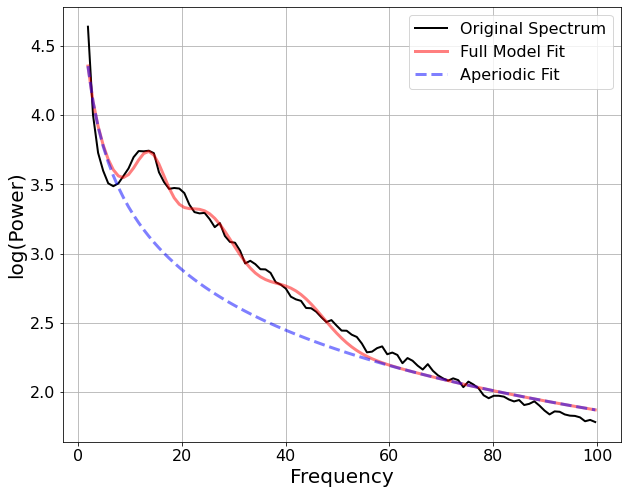

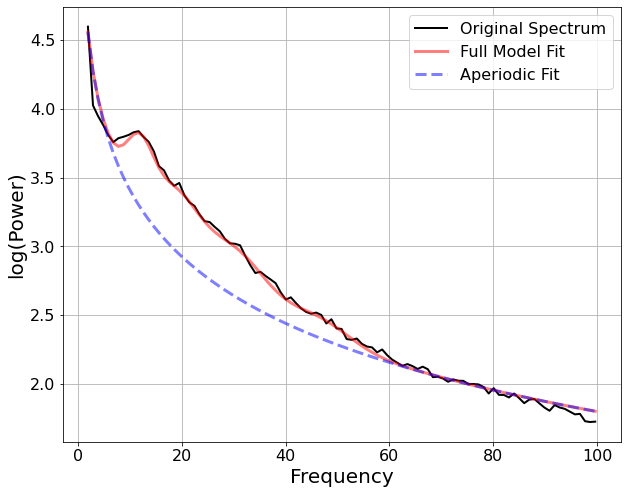

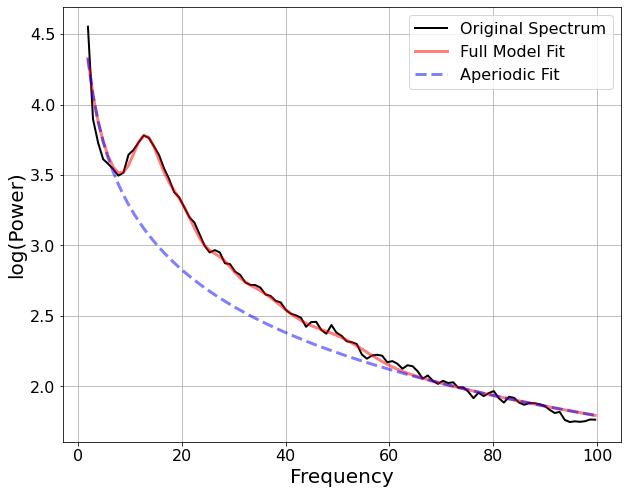

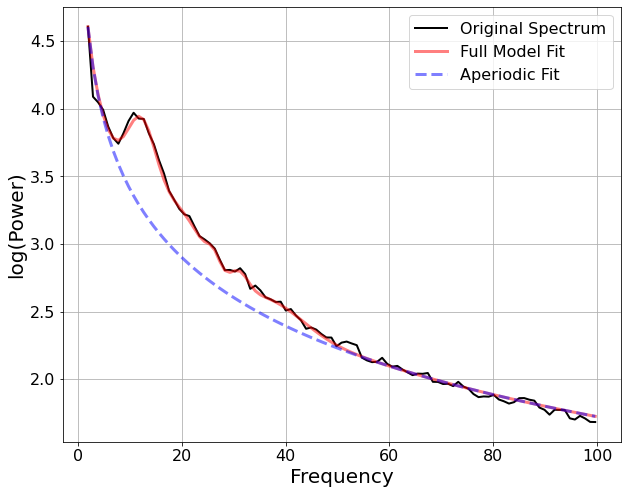

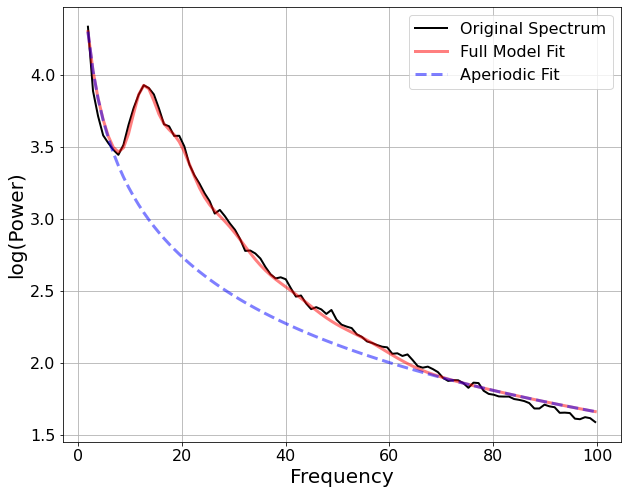

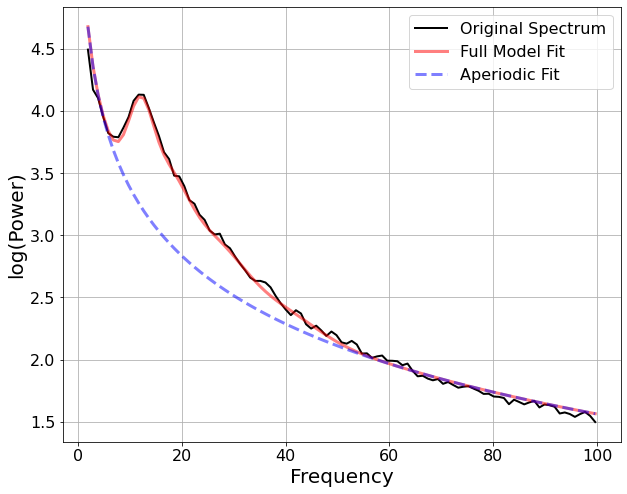

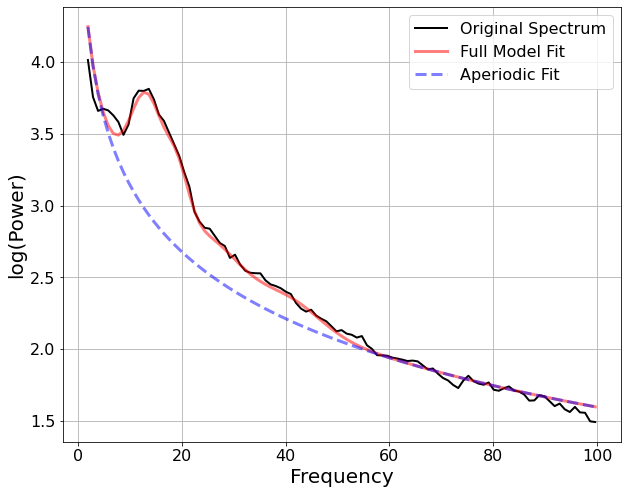

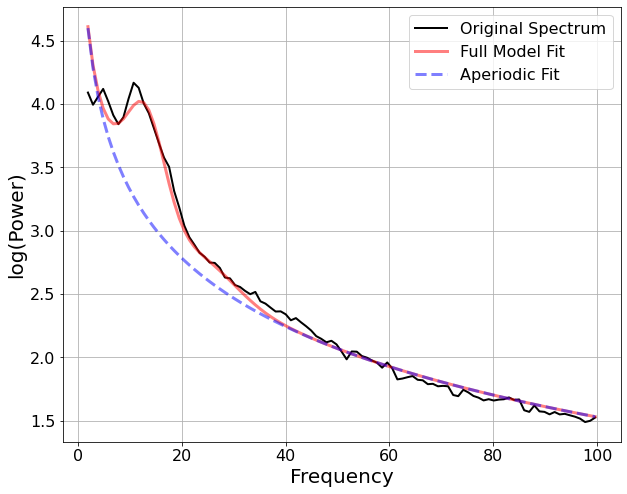

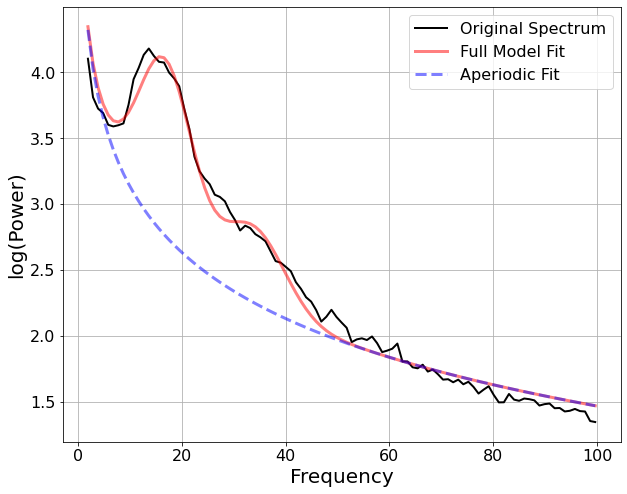

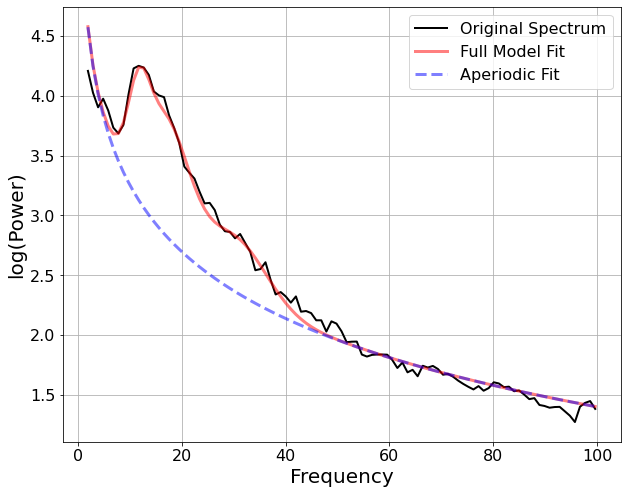

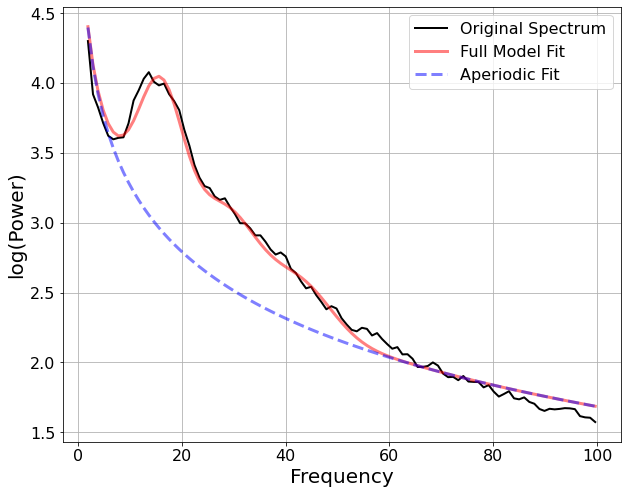

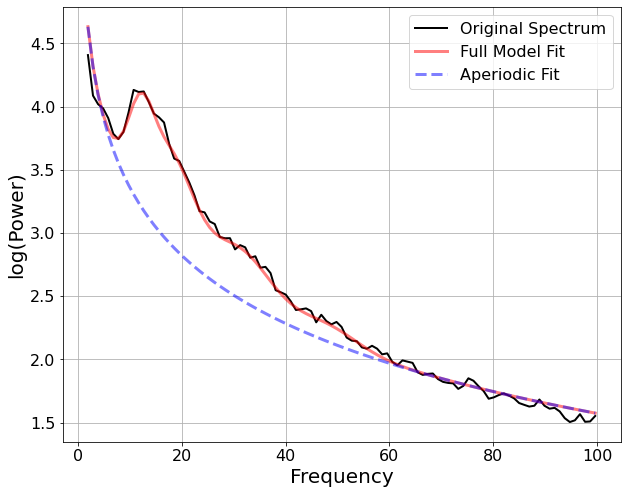

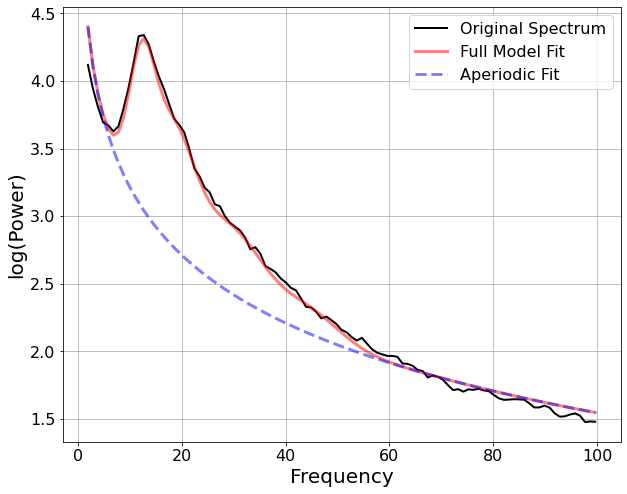

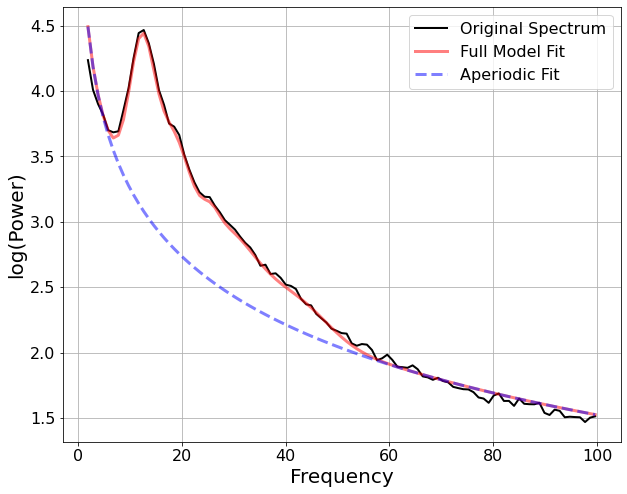

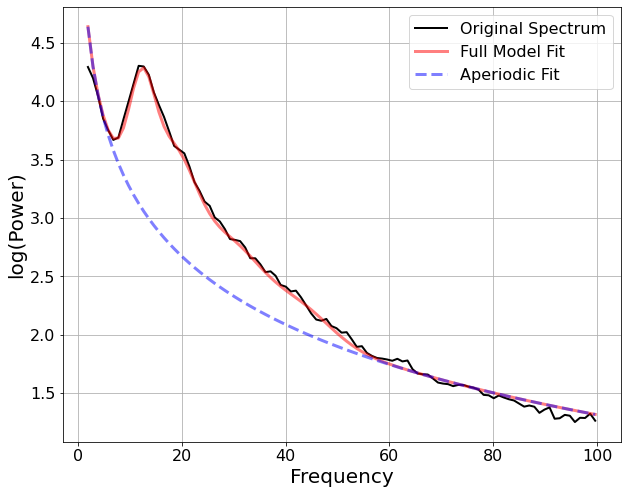

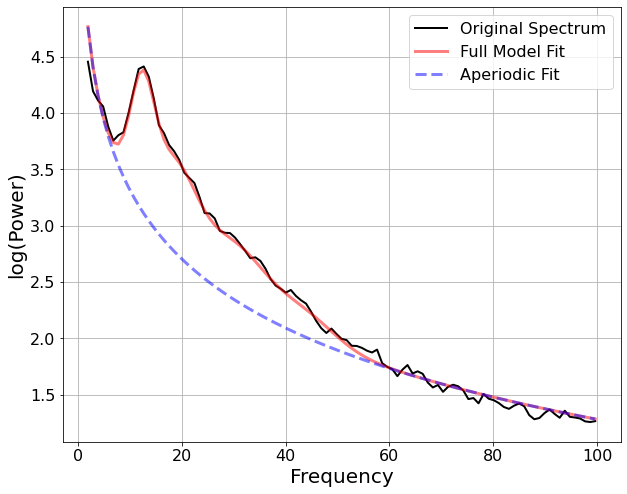

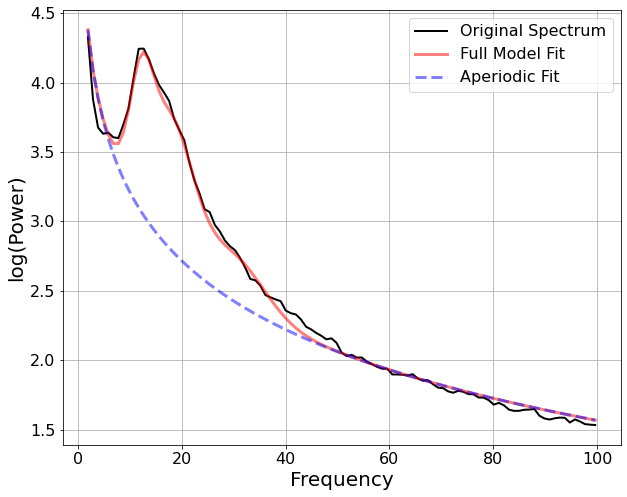

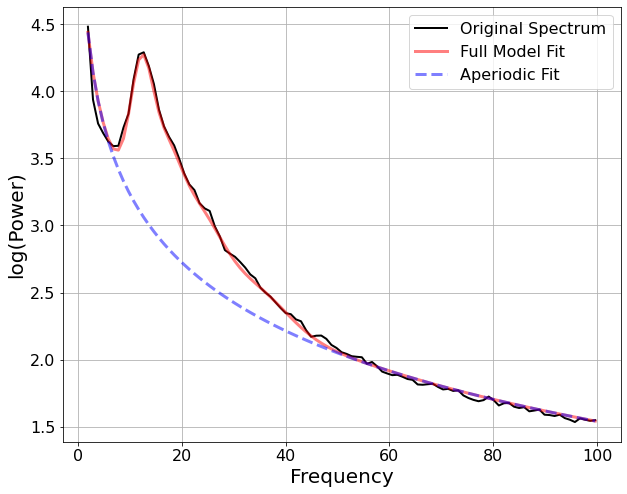

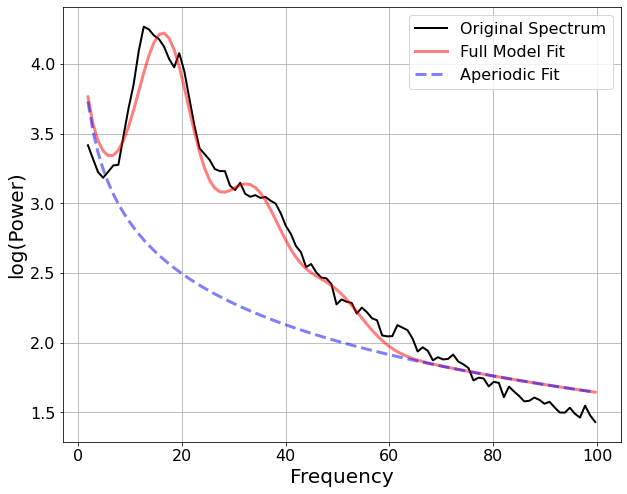

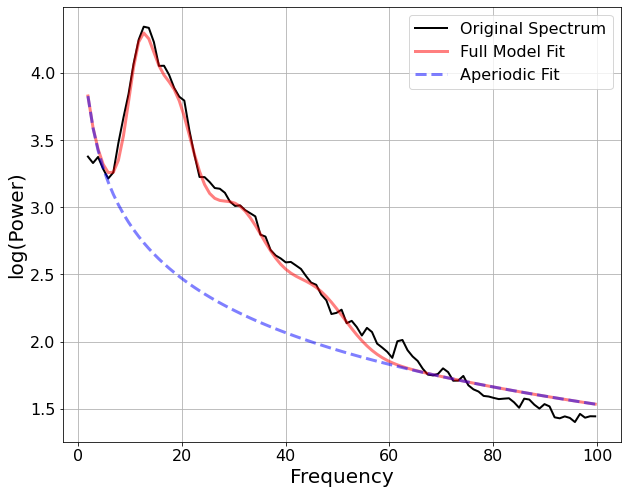

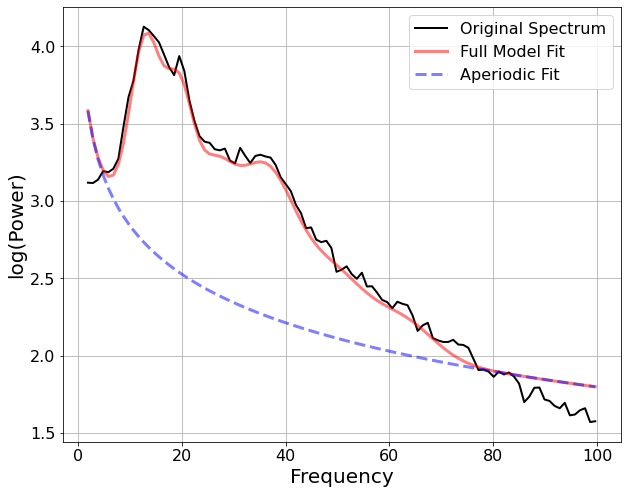

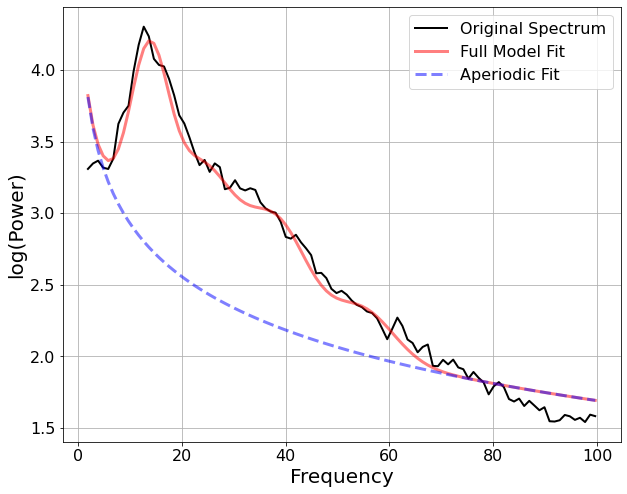

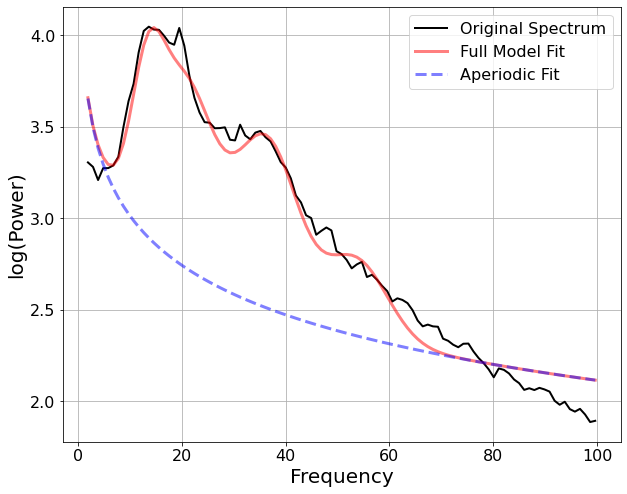

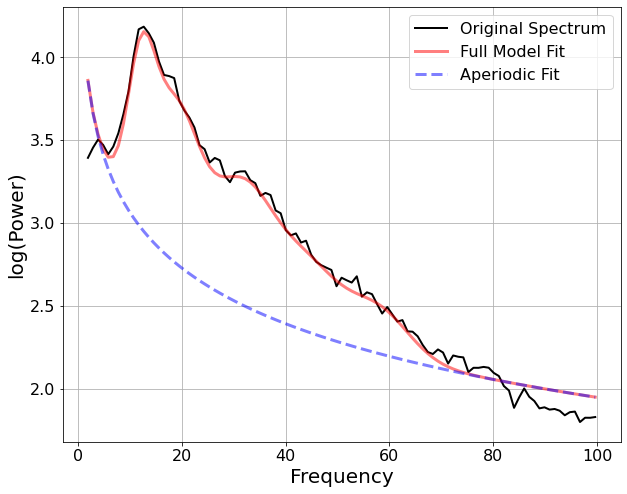

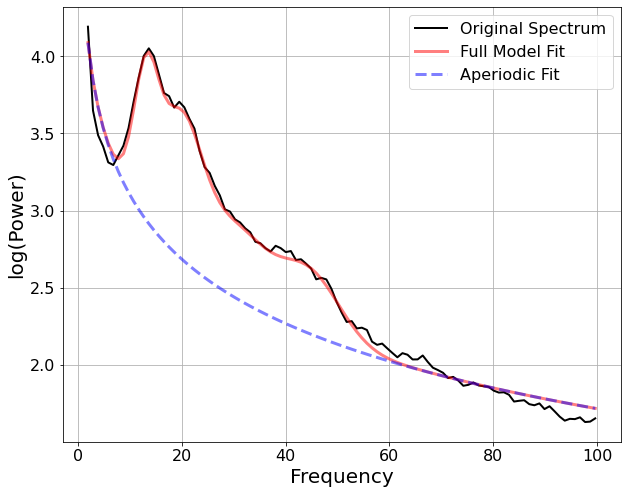

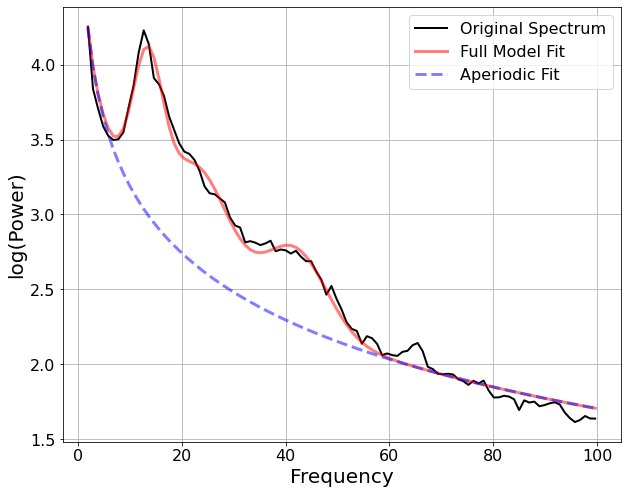

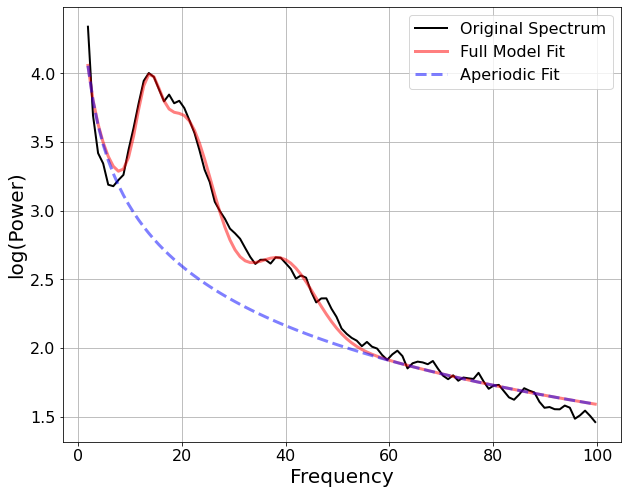

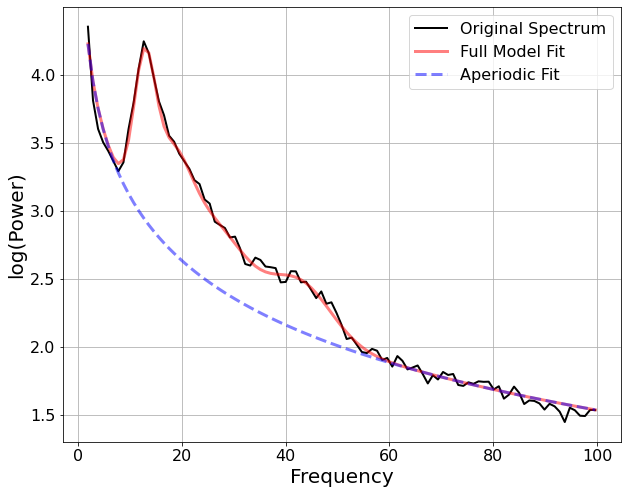

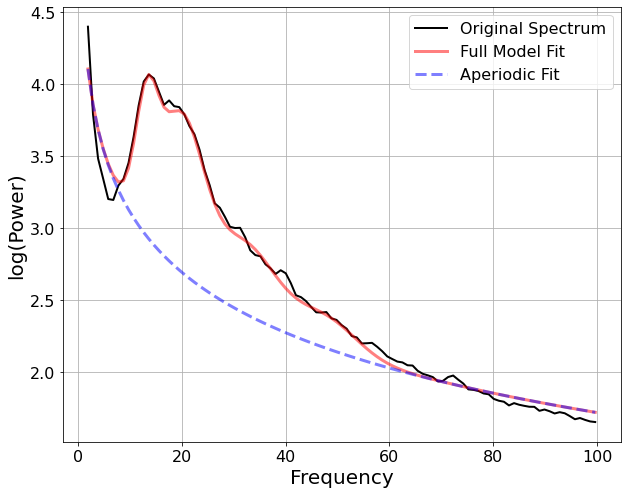

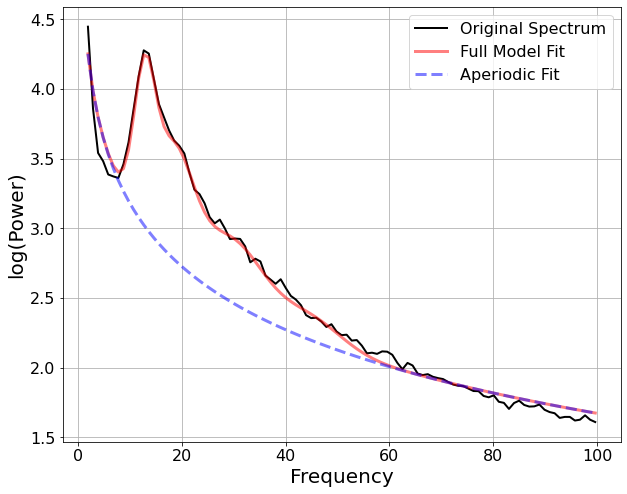

In [30]:
datadir = '/Volumes/NONAME/data_for_Yirong'
region = 'V4'
epoch = 'PreFirstDimDataBiZSc'

fs = 1000
T = 1024
deltaT = T / fs 
binSize = T / fs

for i in range(len(testdata)):
    mid = testdata.iloc[i]['MonkeyId']
    sid = testdata.iloc[i]['SessionId']
    
    ## get data information from csv
    df = pd.read_csv(os.path.join(datadir, 'Subject_Info_corrected.csv'), index_col=0)
    i = df.loc[(df.SessionID == sid) & (df.MonkeyID == mid) & (df.Region == 'V4')].index.values[0]
    monkey_id = int(df.iloc[i]['MonkeyID'])
    monkey_name = df.iloc[i]['MonkeyName']
    region = df.iloc[i]['Region']
    ## load data
    filepath = os.path.join(datadir, 'M%d%s-LFP/%s_%s_LFP_%s_sorted.mat' % (monkey_id, region, monkey_name, region, sid))

    data = mat73.loadmat(filepath)['LfpStruct']['Sorted']
    
    for layer in ['Infra','Granr','Supra']:
        for atten_cond in ['RF','OUT']:
            ## sort data into OUT and RF
            if atten_cond == 'OUT':
                sig1 = sort_sig_input(data['Full'][layer]['OUT1'][epoch], atten_cond)
                sig2 = sort_sig_input(data['Full'][layer]['OUT2'][epoch], atten_cond)
                sig_in = np.concatenate((sig1, sig2), axis=0)
            else:
                sig = data['Full'][layer][atten_cond][epoch]
                sig_in = sort_sig_input(sig, atten_cond)


            data_mean = np.average(np.average(sig_in, axis=1), axis=0)
            data_var = np.average(np.var(sig_in, axis=1), axis=0)
            numTrials = sig_in.shape[0]
            data_sumStat = comp_psd(sig_in)
            f_axis = np.fft.rfftfreq(1024, 1/fs)[1:-1]
            
            # Initialize a FOOOF object
            fm = FOOOF()

            # Set the frequency range to fit the model
            freq_range = [1, 100]

            # Report: fit the model, print the resulting parameters, and plot the reconstruction
            fm.fit(f_axis, data_sumStat, freq_range)
            fm.print_results()
            fm.plot(save_fig=True,file_name='M%d%s-LFP_%s_%s_%s.png' % (monkey_id, region, sid, layer, atten_cond), file_path=os.path.join(datadir,'FOOOF_results'))

In [1]:
# add the path to the abcTau package
import sys
sys.path.append('./abcTau')
# import the package
import abcTau 
import numpy as np
from scipy import stats
import pandas as pd
import os
import scipy.io as sio
import mat73

In [58]:
def OU_gen(tau, D, deltaT, T, numTrials):
    """Generate an OU process with a single timescale, zero mean and unit variance.

    Parameters
    -----------
    tau : float
        timescale.
    D : float
        diffusion parameter.
    deltaT : float
        temporal resolution for the OU process generation.    
    T : float
        duration of trials.
    numTrials : float
        number of trials.
    
    
    Returns
    -------
    ou : nd array
        array of generated OU process (numTrials * (T/deltaT)).
    """
    
    numBin = int(T/deltaT)
    noise =  np.random.normal(loc=0,scale=1, size=(numTrials,numBin))
    ou = np.zeros((numTrials,numBin))
    ou[:,0] = noise[:,0]
    for iBin in range(1,numBin):
        ou[:,iBin]  = ou[:,iBin-1] - (ou[:,iBin-1]/tau) * deltaT + np.sqrt(2*D*deltaT) * noise[:,iBin-1]
        
    return ou

fs = int(1017.375)
T = 1000
deltaT = T / fs
binSize = T / fs
numTrials = 120
tau = 200

D = 1/tau
binsData =  np.arange(0, T + binSize, binSize)
binsData_sin = np.arange(0, T, deltaT)
numBinData = len(binsData)-1

ou_all = OU_gen(tau, D, deltaT, T, numTrials)
time_mat = np.tile(binsData_sin, (numTrials,1))
print(time_mat.shape)
print(ou_all.shape)

(120, 1017)
(120, 1017)


In [54]:
ou_all.shape

(1270, 1017)

In [53]:
time_mat.shape

(1270, 1018)

In [ ]:
# stetting the number of cores for each numpy computation in multiprocessing
# uncomment if you don't want numy to use more cores than what specified by multiprocessing
# import os
# os.environ["OMP_NUM_THREADS"] = "2" 
# os.environ["OPENBLAS_NUM_THREADS"] = "2" 
# os.environ["MKL_NUM_THREADS"] = "2" 
# os.environ["VECLIB_MAXIMUM_THREADS"] = "2" 
# os.environ["NUMEXPR_NUM_THREADS"] = "2" 

In [2]:
def sort_sig_input(sig,atten_cond):
    if len(sig.shape)==2:
        sig = sig.reshape((1,sig.shape[0],sig.shape[1]))
     ## sig (channel, trial, timepoints)
    if atten_cond == 'OUT':
        index = np.random.choice(sig.shape[1],int(sig.shape[1]/2))
        sig = sig[:,index,:]
    avg_sig = np.average(sig, axis=1) # average across trials # (channels, timepoints)
    sig_in = sig.reshape((sig.shape[0]*sig.shape[1],sig.shape[2])) -np.repeat(avg_sig, sig.shape[1], axis=0) # average across channels
    #             print(sig_in.shape)
    return sig_in

In [3]:
def comp_psd(x):
    """Compute the power spectrum density (PSD) using a Hamming window and direct fft.
    Parameters
    -----------
    x1 : nd array
        time-series from binned data (numTrials * numBin).
    T : float
        duration of each trial/time-series.
    deltaT : float
        temporal resolution of data (or binSize of spike counts).    
    
    
    Returns
    -------
    psd : 1d array
        average  power spectrum density (PSD) across all trials.
    """
    n_points = len(x[0])
    x_windowed = (x - x.mean(1)[:,None])*np.hamming(n_points)
    PSD = np.mean(np.abs(np.fft.rfft(x_windowed))**2, axis = 0)[1:-1]
    
    return PSD

In [6]:
sid = 'PEN288'
mid = 1

datadir = '/Volumes/NONAME/data_for_Yirong'

fs = 1017.375
deltaT = 1 / fs  # temporal resolution of data.
binSize = 1 / fs  # bin-size for binning data and computing the autocorrelation.
disp = None  # put the disperssion parameter if computed with grid-search
maxTimeLag = None  # only used when using autocorrelation for summary statistics

df = pd.read_csv(os.path.join(datadir, 'Subject_Info_corrected.csv'), index_col=0)
i = df.loc[(df.SessionID==sid)&(df.MonkeyID==mid)&(df.Region=='V4')].index.values[0]
layers = ['Supra', 'Granr', 'Infra']
epochs = ['StationaryDataBiZSc', 'PreFirstDimDataBiZSc']
scales = [int(fs * 0.43), int(fs * 1)]
monkey_id = int(df.iloc[i]['MonkeyID'])
monkey_name = df.iloc[i]['MonkeyName']
region = df.iloc[i]['Region']
filepath = os.path.join(datadir, 'M%d%s-LFP/%s_%s_LFP_%s_sorted.mat' % (monkey_id, region, monkey_name, region, sid))
data = mat73.loadmat(filepath)['LfpStruct']['Sorted']

In [7]:

# select summary statistics metric
summStat_metric = 'comp_psd'
ifNorm = True  # if normalize the autocorrelation or PSD


# select generative model and distance function
generativeModel = 'oneTauOU_oscil'
distFunc = 'logarithmic_distance'

# set fitting params
epsilon_0 = 1  # initial error threshold
min_samples = 100  # min samples from the posterior
steps = 60  # max number of iterations
minAccRate = 0.01  # minimum acceptance rate to stop the iterations
parallel = True  # if parallel processing
n_procs = 5  # number of processor for parallel processing (set to 1 if there is no parallel processing)

In [14]:
layer = layers[0]
for i, epoch in enumerate(epochs):
    for j, atten_cond in enumerate(['RF', 'OUT']):
        if atten_cond == 'OUT':
            sig1 = sort_sig_input(data['Full'][layer]['OUT1'][epoch], atten_cond)
            sig2 = sort_sig_input(data['Full'][layer]['OUT2'][epoch], atten_cond)
            sig_in = np.concatenate((sig1, sig2), axis=0)
        else:
            sig = data['Full'][layer][atten_cond][epoch]
            sig_in = sort_sig_input(sig, atten_cond)
        data_mean = np.average(sig_in, axis=1)
        data_var = np.var(sig_in, axis=1)
        T = scales[i] / fs
        numTrials = sig_in.shape[0]
        data_sumStat = comp_psd(sig_in[:, 0:scales[i]])
        # Define the prior distribution
        # for a uniform prior: stats.uniform(loc=x_min,scale=x_max-x_min)
        t_min = 0.0  # first timescale
        t_max = scales[i] / fs
        priorDist = [stats.uniform(loc=t_min, scale=t_max - t_min)]

        # path for loading and saving data
        datasave_path = os.path.join(datadir, '../abc_results_%s_M%d_%s_%s' % (sid, mid, atten_cond, epoch))

        # path and filename to save the intermediate results after running each step
        inter_save_direc = os.path.join(datadir, '../abc_results_%s_M%d_%s_%s' % (sid, mid, atten_cond, epoch))
        inter_filename = './abc_intermediate_results_psd'

        # load real data and define filenameSave
        filenameSave = '%s_%s_M%d_%s_%s' % (generativeModel,sid, mid, atten_cond, epoch)

                # creating model object
        class MyModel(abcTau.Model):

            #This method initializes the model object.  
            def __init__(self):
                pass

            # draw samples from the prior. 
            def draw_theta(self):
                theta = []
                for p in self.prior:
                    theta.append(p.rvs())
                return theta

            # Choose the generative model (from generative_models)
            # Choose autocorrelation computation method (from basic_functions)
            def generate_data(self, theta):
                # generate synthetic data
                if disp == None:
                    syn_data, numBinData =  eval('abcTau.generative_models.' + generativeModel + \
                                                 '(theta, deltaT, binSize, T, numTrials, data_mean, data_var)')
                else:
                    syn_data, numBinData =  eval('abcTau.generative_models.' + generativeModel + \
                                                 '(theta, deltaT, binSize, T, numTrials, data_mean, data_var, disp)')

                # compute the summary statistics
                syn_sumStat = abcTau.summary_stats.comp_sumStat(syn_data, summStat_metric, ifNorm, deltaT, binSize, T,\
                                                  numBinData, maxTimeLag)   
                return syn_sumStat

            # Computes the summary statistics
            def summary_stats(self, data):
                sum_stat = data
                return sum_stat

            # Choose the method for computing distance (from basic_functions)
            def distance_function(self, data, synth_data):
                if np.nansum(synth_data) <= 0: # in case of all nans return large d to reject the sample
                    d = 10**4
                else:
                    d = eval('abcTau.distance_functions.' +distFunc + '(data, synth_data)')        
                return d


        # fit with aABC algorithm for any generative model
        abc_results, final_step = abcTau.fit.fit_withABC(MyModel, data_sumStat, priorDist, inter_save_direc, inter_filename,
                                                         datasave_path, filenameSave, epsilon_0, min_samples,
                                                         steps, minAccRate, parallel, n_procs, disp)

AttributeError: module 'abcTau' has no attribute 'Model'

In [10]:
# creating model object
class MyModel(abcTau.Model):

    #This method initializes the model object.  
    def __init__(self):
        pass

    # draw samples from the prior. 
    def draw_theta(self):
        theta = []
        for p in self.prior:
            theta.append(p.rvs())
        return theta

    # Choose the generative model (from generative_models)
    # Choose autocorrelation computation method (from basic_functions)
    def generate_data(self, theta):
        # generate synthetic data
        if disp == None:
            syn_data, numBinData =  eval('abcTau.generative_models.' + generativeModel + \
                                         '(theta, deltaT, binSize, T, numTrials, data_mean, data_var)')
        else:
            syn_data, numBinData =  eval('abcTau.generative_models.' + generativeModel + \
                                         '(theta, deltaT, binSize, T, numTrials, data_mean, data_var, disp)')
               
        # compute the summary statistics
        syn_sumStat = abcTau.summary_stats.comp_sumStat(syn_data, summStat_metric, ifNorm, deltaT, binSize, T,\
                                          numBinData, maxTimeLag)   
        return syn_sumStat

    # Computes the summary statistics
    def summary_stats(self, data):
        sum_stat = data
        return sum_stat

    # Choose the method for computing distance (from basic_functions)
    def distance_function(self, data, synth_data):
        if np.nansum(synth_data) <= 0: # in case of all nans return large d to reject the sample
            d = 10**4
        else:
            d = eval('abcTau.distance_functions.' +distFunc + '(data, synth_data)')        
        return d


AttributeError: module 'abcTau' has no attribute 'Model'

In [31]:

# path for loading and saving data
datasave_path = os.path.join(datadir,'example_abc_results')

# path and filename to save the intermediate results after running each step
inter_save_direc = os.path.join(datadir,'example_abc_results')
inter_filename = './abc_intermediate_results_psd'

# load real data and define filenameSave
filenameSave = 'OU_tau20_mean0_var1_rawData'


# fit with aABC algorithm for any generative model
abc_results, final_step = abcTau.fit.fit_withABC(MyModel, data_sumStat, priorDist, inter_save_direc, inter_filename,\
                                                 datasave_path,filenameSave, epsilon_0, min_samples, \
                                                 steps, minAccRate, parallel, n_procs, disp)

Starting step 0
epsilon = 1
Running 100.0 particles on 1 processors



KeyboardInterrupt



In [15]:
t_min = 0
t_max = 300
stats.uniform(loc=t_min, scale=t_max - t_min)